In [12]:
import numpy as np
from scipy import interpolate
import scipy.io as sio
import Rbeast as rb
from SLM_tools import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [13]:
energy = sio.loadmat(r"C:\Users\User\OneDrive - mail.tau.ac.il\Documents\Final Project\Project2-Omri and Idan\Results\06_30_2022_10_12_02_mu_0__0_2__2_8_Js__4_0_runs_2\2\3\energy_vec_mu_1.6_energy_4.0_run_num_1_total_num_target_2.mat")
energy = energy["foo"]

In [14]:
data,time = SLM_tools.interpolate_data_over_regular_time(energy)
print(data.shape)

(1, 50000000)


In [15]:
data = signal.decimate(data, 1000,ftype='fir')

In [ ]:
data,time = SLM_tools.downsample(data,time,1000)
print(data.shape)

In [ ]:
data,time = SLM_tools.downsample(data,time,10)
print(data.shape)

In [ ]:
data,time = SLM_tools.downsample(data,time,10)
print(data.shape)

In [16]:
# with tqdm(total=1) as pbar:
o = rb.beast(data, 0, tseg_minlength=0.1 * data.shape[1], season="none", torder_minmax=[1, 1.01])
    # pbar.update(1)


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 50000
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend       : False 

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


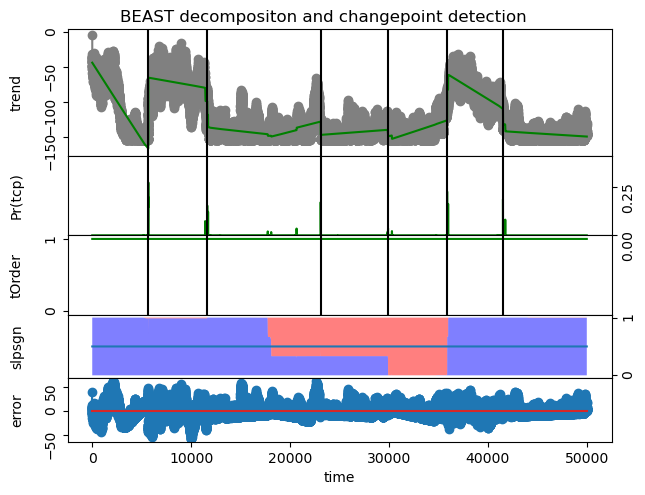

In [17]:
# plt.switch_backend('Agg')
x=rb.plot(o)

In [18]:
type(o.trend.Y)

numpy.ndarray